# Step 1: Understanding the dataset

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading my csv dataset file into notebook
customer_df = pd.read_csv('Customer_Churn.csv')

In [3]:
#viewing the content of diabetes_df
customer_df

,call_failures,complains,subscription_length,charge_amount,seconds_of_use,use_frequency,sms_frequency,distinct_calls,age_group,tariff_plan,status,age,customer_value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [4]:
customer_df.shape

(3150, 14)

In [5]:
customer_df.describe()

,call_failures,complains,subscription_length,charge_amount,seconds_of_use,use_frequency,sms_frequency,distinct_calls,age_group,tariff_plan,status,age,customer_value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [6]:
#confirming the data types
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   call_failures        3150 non-null   int64  
 1   complains            3150 non-null   int64  
 2   subscription_length  3150 non-null   int64  
 3   charge_amount        3150 non-null   int64  
 4   seconds_of_use       3150 non-null   int64  
 5   use_frequency        3150 non-null   int64  
 6   sms_frequency        3150 non-null   int64  
 7   distinct_calls       3150 non-null   int64  
 8   age_group            3150 non-null   int64  
 9   tariff_plan          3150 non-null   int64  
 10  status               3150 non-null   int64  
 11  age                  3150 non-null   int64  
 12  customer_value       3150 non-null   float64
 13  Churn                3150 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 344.7 KB


In [7]:
customer_df.iloc[:,13].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

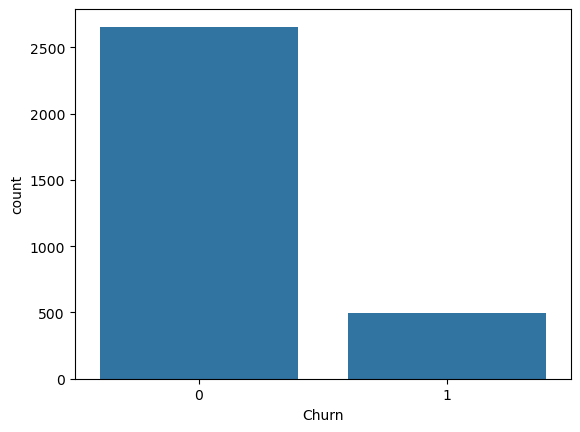

In [8]:
#checking the discrepancy within the class label
sns.countplot(customer_df, x="Churn")

In [9]:
#checking if there is any null value in the dataset

customer_df.iloc[:,:].isnull().values.any()

False

In [10]:
customer_df.isnull().sum()

call_failures          0
complains              0
subscription_length    0
charge_amount          0
seconds_of_use         0
use_frequency          0
sms_frequency          0
distinct_calls         0
age_group              0
tariff_plan            0
status                 0
age                    0
customer_value         0
Churn                  0
dtype: int64

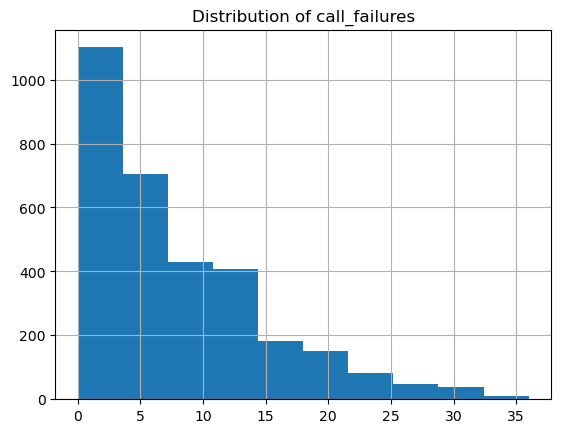

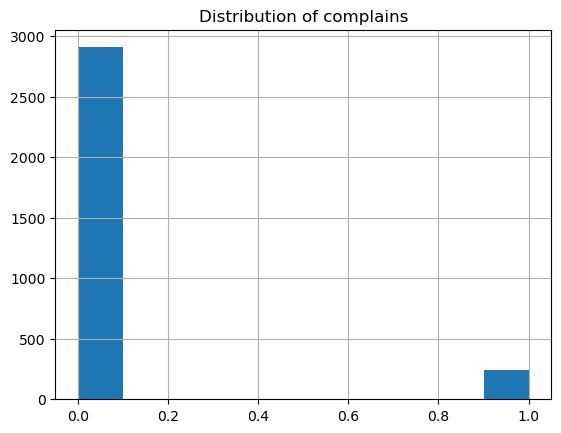

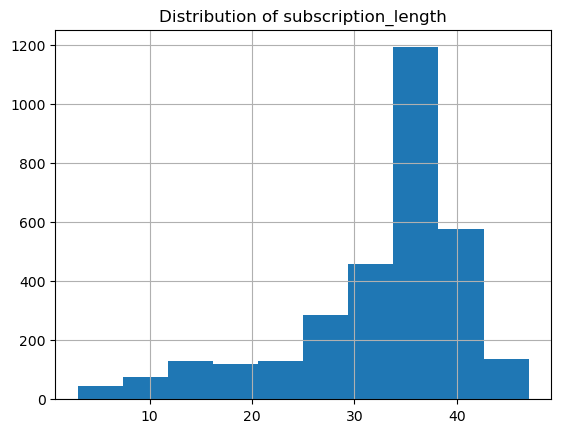

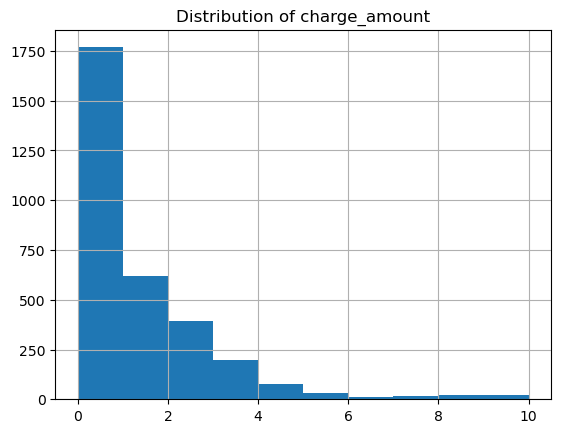

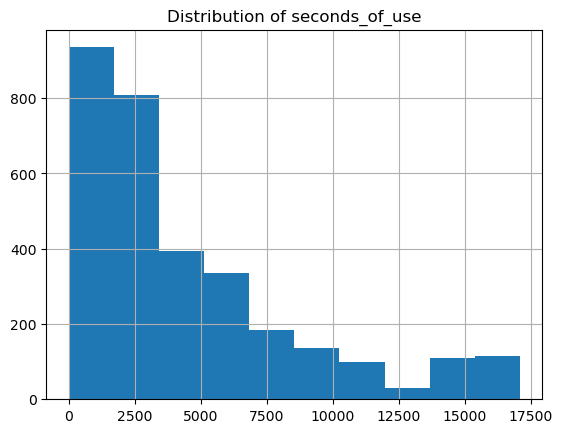

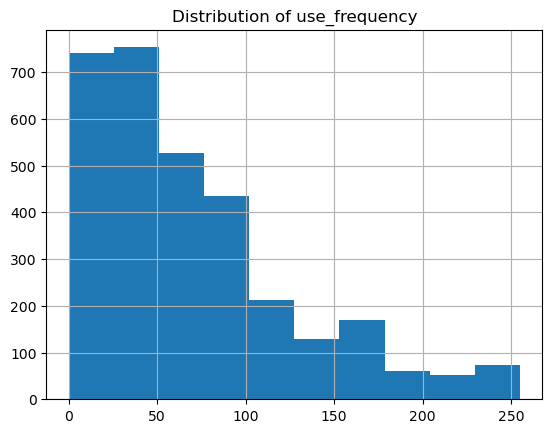

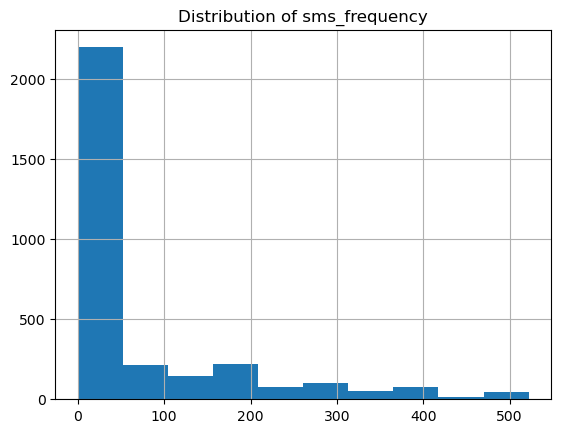

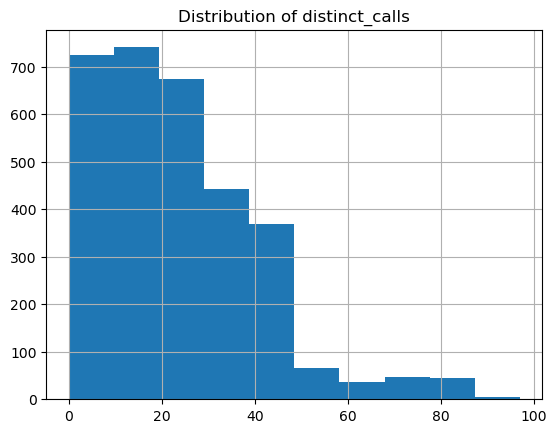

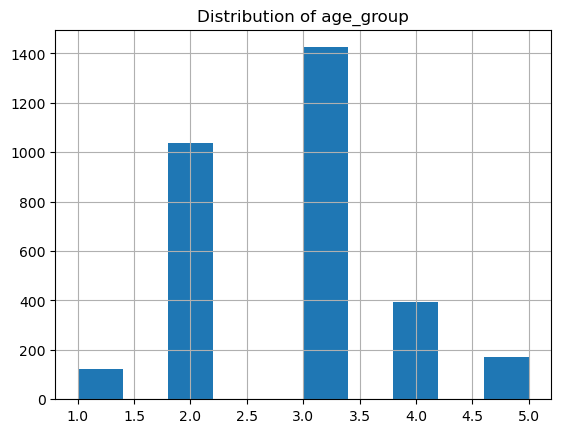

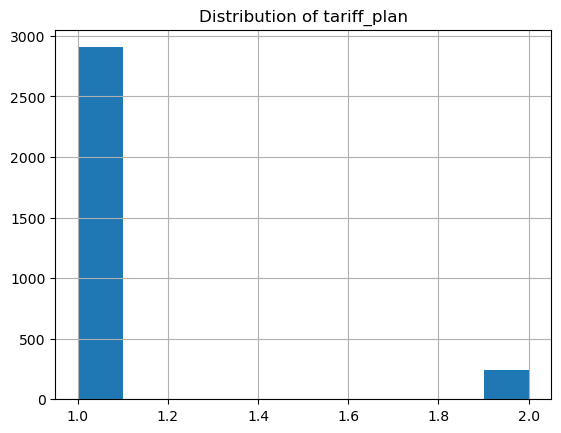

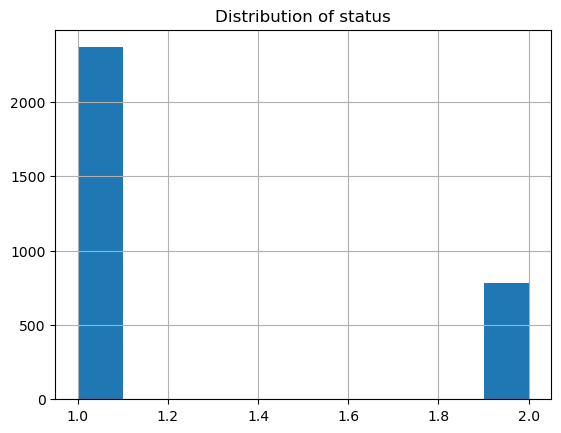

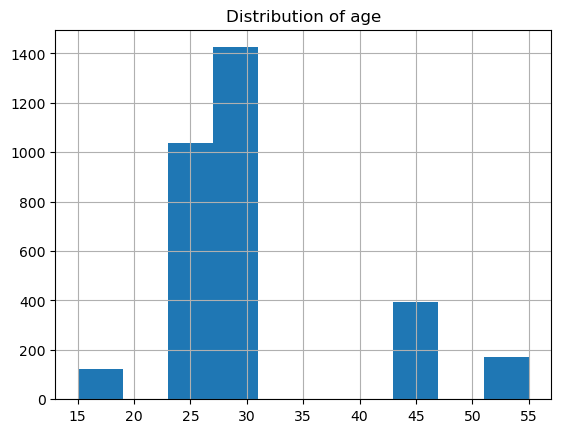

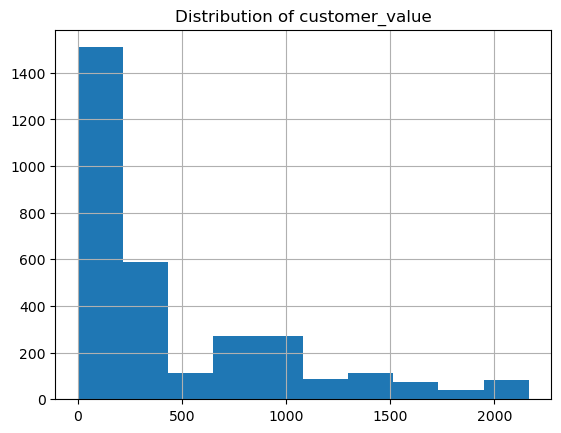

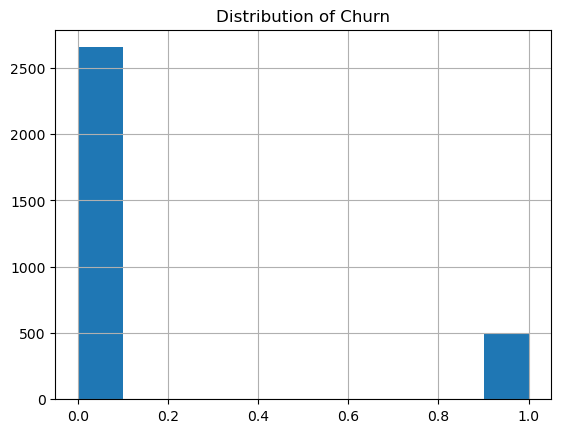

In [11]:
# Explore the distribution of attributes
for col in customer_df:
    customer_df[col].hist()
    plt.title(f"Distribution of {col}")
    plt.show()

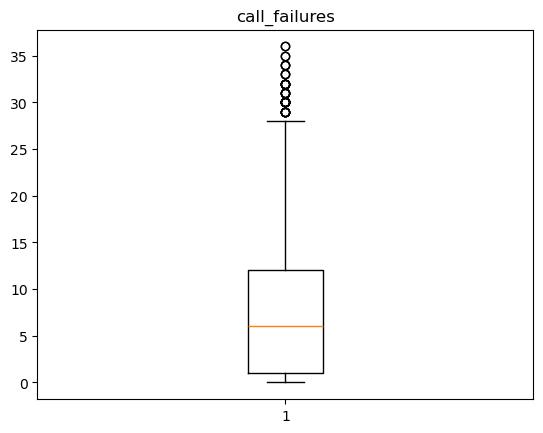

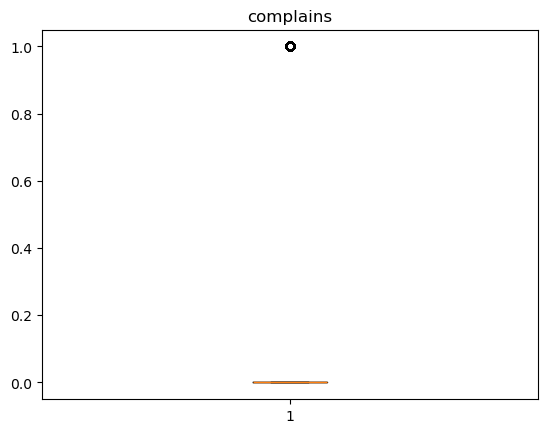

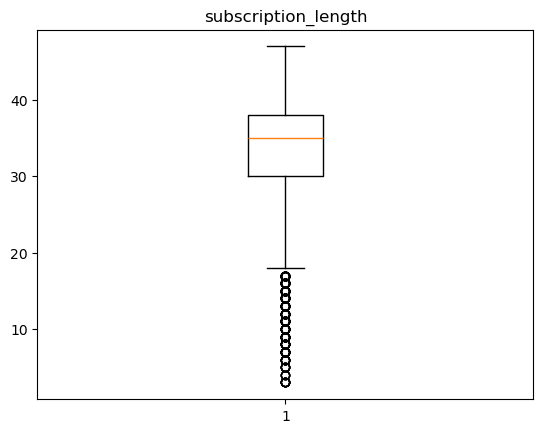

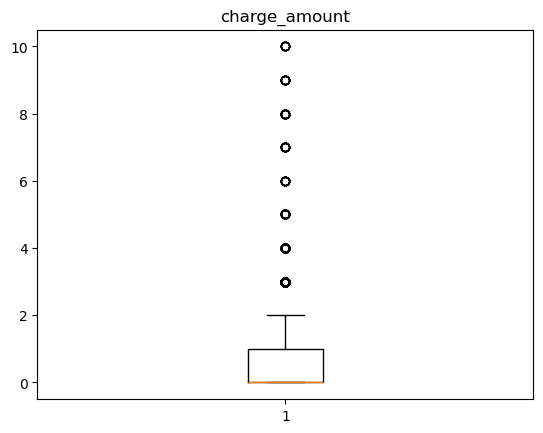

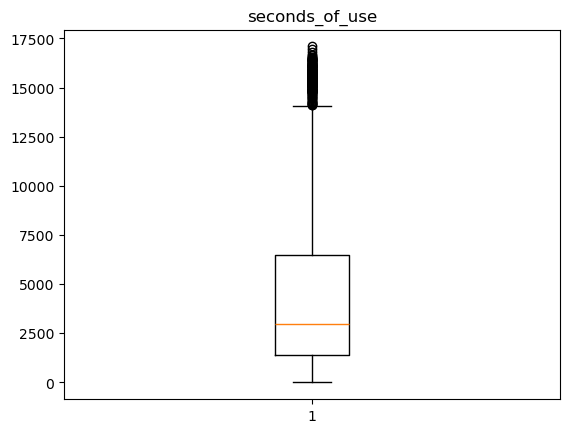

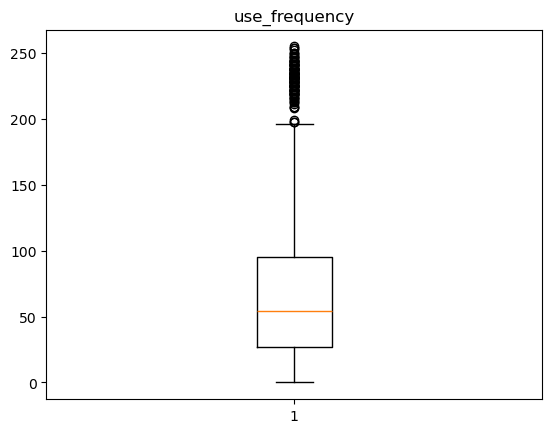

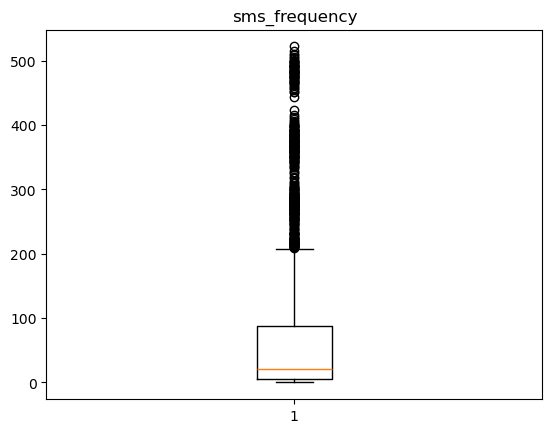

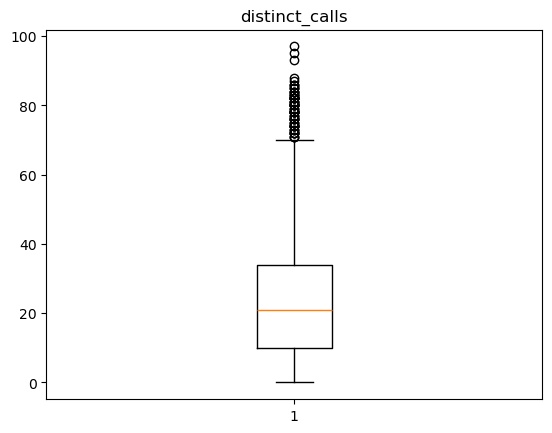

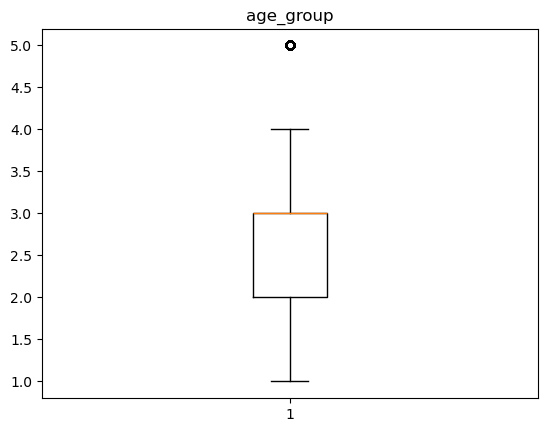

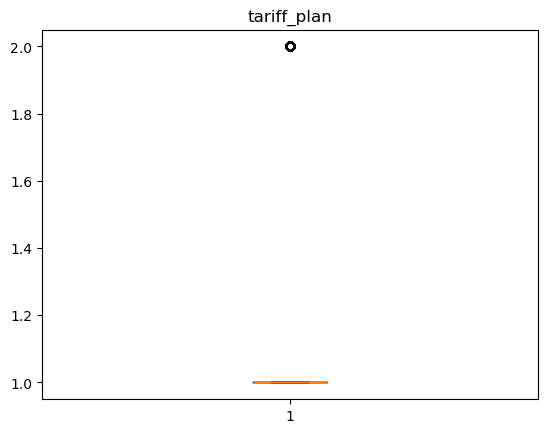

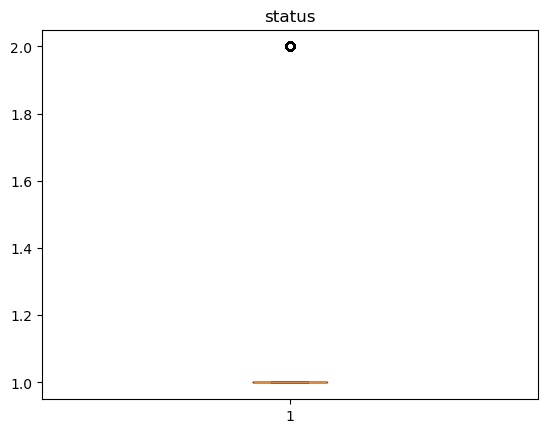

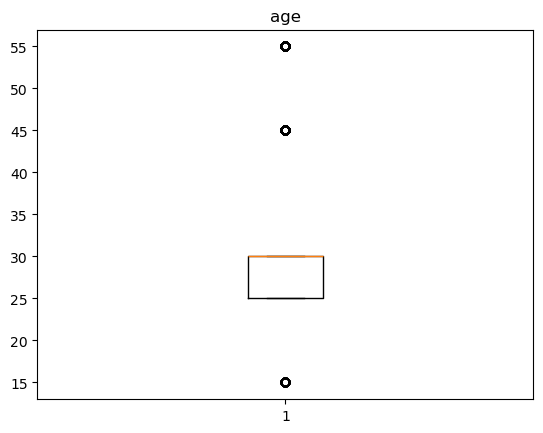

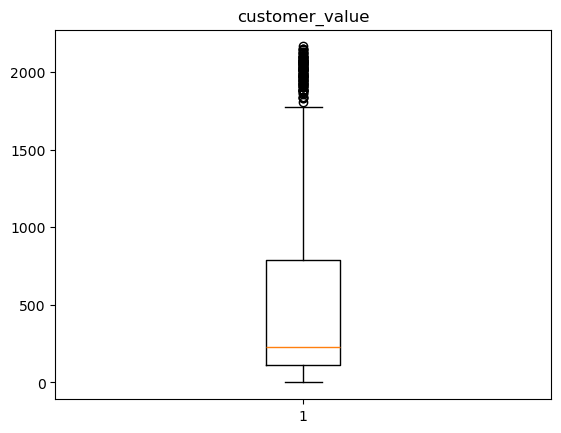

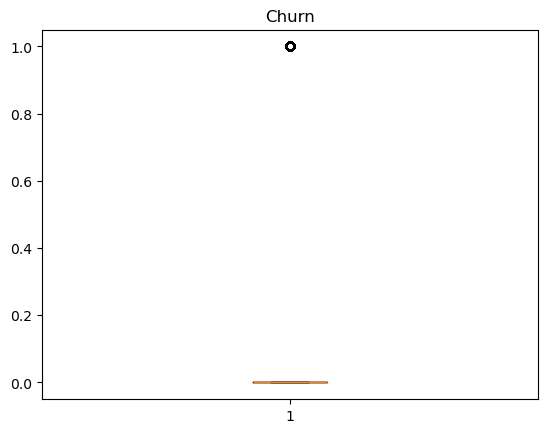

In [12]:
for col in customer_df.select_dtypes(include=['number']).columns:
    plt.boxplot(customer_df[col])
    plt.title(col)
    plt.show()

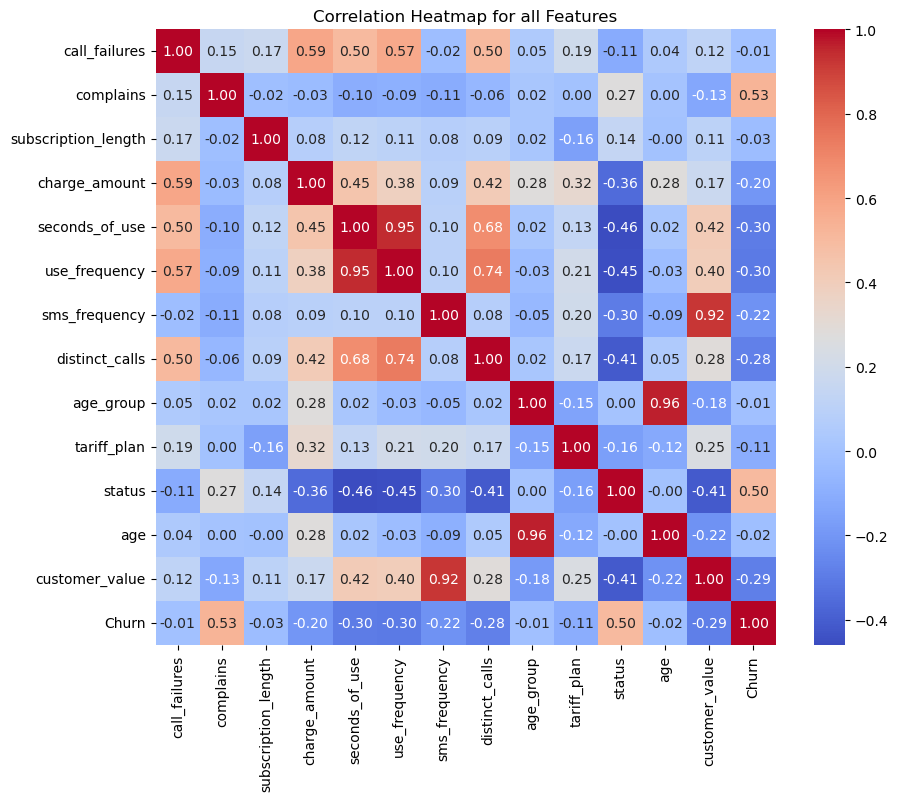

In [13]:
correlation_matrix = customer_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for all Features')
plt.show()

<Axes: xlabel='charge_amount', ylabel='count'>

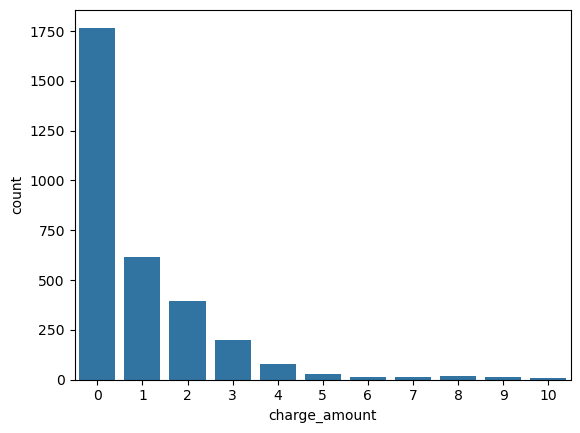

In [14]:
sns.countplot(customer_df, x="charge_amount")

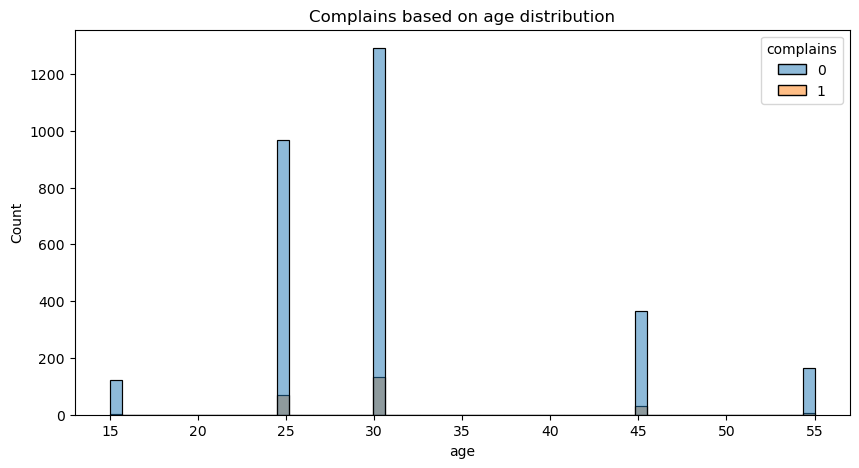

In [15]:
#to observe some patterns in the dataset

plt.figure(figsize=(10,5))
plt.title("Complains based on age distribution")
sns.histplot(x="age", hue="complains", data=customer_df)
plt.show()

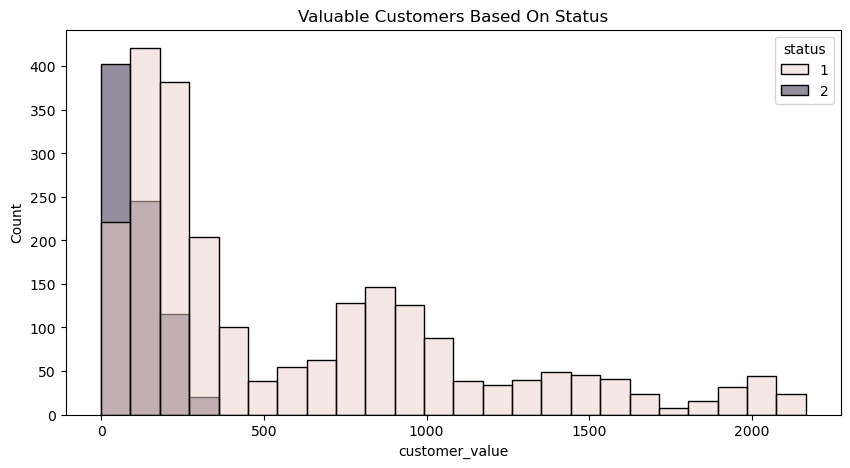

In [16]:
#to observe some patterns in the dataset

plt.figure(figsize=(10,5))
plt.title("Valuable Customers Based On Status")
sns.histplot(x="customer_value", hue="status", data=customer_df)
plt.show()

# Step 2: Data Preparation

##### In this step, 
##### --the dataset was split into training and test datasets first,
##### --followed by Data Normalization and Feature Selection
##### --then the class imbalance in the training dataset was addressed before passing it into the model


In [17]:
#Dealing with class imbalance, first we determine the input features and class feature:

X = customer_df.drop('Churn',axis=1) 
y = customer_df['Churn']

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and the Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)

In [19]:
# Standardise both datasets before passing to model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train) 
X_test_Scaled = scaler.transform(X_test)

In [20]:
#selecting the best features from both train and test datasets using RFECV model
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0) 
rfecv = RFECV(rf, cv=5, step=1)
X_train_fs = rfecv.fit_transform(X_train_Scaled, y_train)
X_test_fs = rfecv.transform(X_test_Scaled)
print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 11


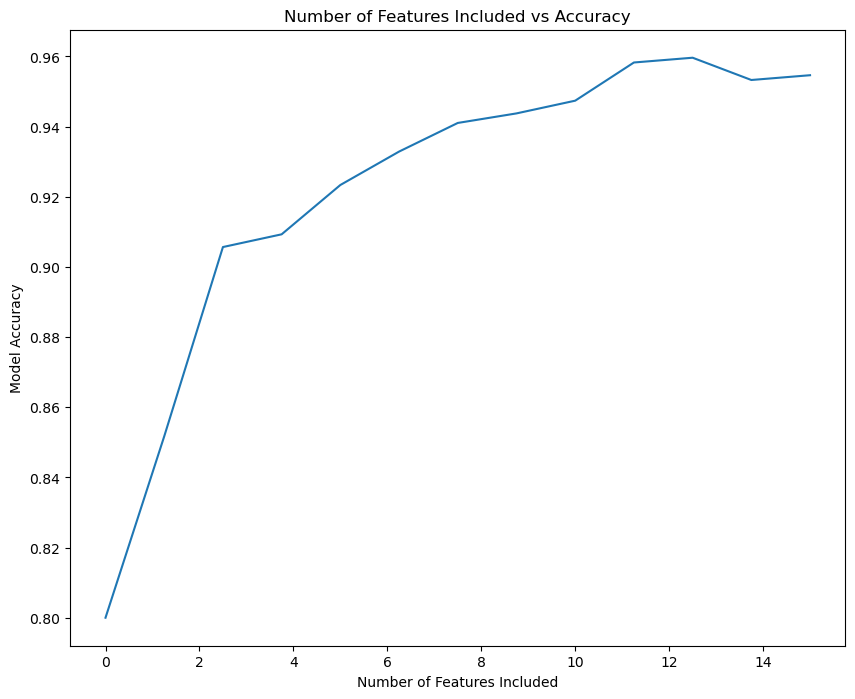

In [21]:
#plot the model accuracy against the number of features

plt.figure( figsize=(10, 8))
plt.title('Number of Features Included vs Accuracy') 
plt.xlabel('Number of Features Included') 
plt.ylabel('Model Accuracy')
plt.plot(np.linspace(0,15,13), rfecv.cv_results_['mean_test_score']) 
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

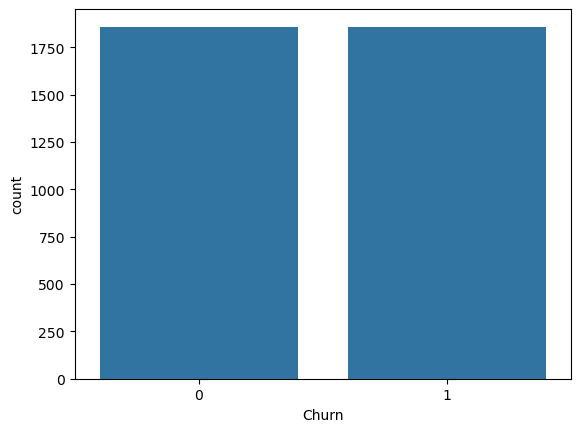

In [22]:
#implementing SMOTE on the training dataset to resolve class imbalance

from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state=0)
X_train_smote, y_train_smote = resampler.fit_resample(X_train_fs, y_train)

sns.countplot(x=y_train_smote)

In [23]:
y_train_smote.value_counts()

Churn
0    1858
1    1858
Name: count, dtype: int64

# Step 3: Building a Model using RandomForestClassifier (RFC)

In [24]:
#instantiating a new RandomForestClassifier model, and then fit it to the data with the selected features

rf_selectedfeatures = RandomForestClassifier() 
rf_selectedfeatures.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

# Step 4: Testing and evaluating the Model

In [25]:
# Make predictions on the test data
y_pred = rf_selectedfeatures.predict(X_test_fs)

from sklearn.metrics import accuracy_score, confusion_matrix 

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Score: 94.92%


Further Evaluations:

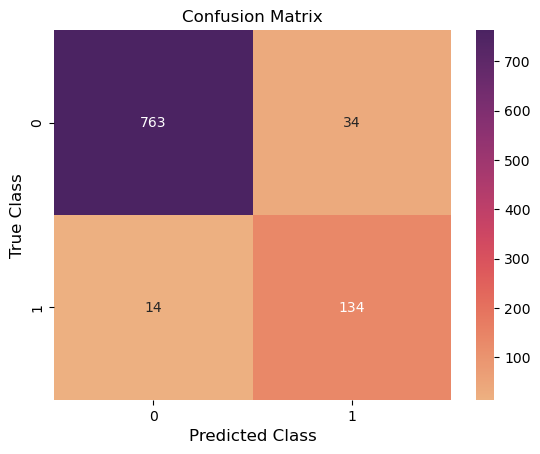

In [26]:
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [27]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.95


Confusion Matrix:
[[763  34]
 [ 14 134]] 


--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       797
           1       0.80      0.91      0.85       148

    accuracy                           0.95       945
   macro avg       0.89      0.93      0.91       945
weighted avg       0.95      0.95      0.95       945

